In [1]:
# load modules
import os
import numpy as np
import pandas as pd
import pickle

# Plotting imports
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

import palantir
import scanpy as sc
sc.settings.verbosity = 2

In [2]:
import random
random.seed(0)

In [3]:
%matplotlib inline

In [5]:
#anndata     0.9.2
#scanpy      1.9.3
#scanpy.set_figure_params(scanpy=True, dpi=80, dpi_save=150, frameon=True, vector_friendly=True, fontsize=14, figsize=None, color_map=None, format='pdf', facecolor=None, transparent=False, ipython_format='png2x')
#save='_myfigure.svg/pdf/etc
sc.logging.print_versions()

-----
anndata     0.9.2
scanpy      1.9.3
-----
CoreFoundation              NA
Foundation                  NA
PIL                         10.0.0
PyObjCTools                 NA
anyio                       NA
appnope                     0.1.3
arrow                       1.2.3
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.12.1
backcall                    0.2.0
brotli                      1.0.9
certifi                     2024.02.02
cffi                        1.15.1
charset_normalizer          3.2.0
comm                        0.1.3
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.6.7
decorator                   5.1.1
defusedxml                  0.7.1
executing                   1.2.0
fastjsonschema              NA
fcsparser                   0.2.8
fqdn                        NA
h5py                        3.9.0
idna         

## Download data

Anndata objects with all the data and metadata are publically avaiable at: https://s3.amazonaws.com/dp-lab-data-public/palantir/human_cd34_bm_rep[1-3].h5ad. This notebook use replicate 1 (https://s3.amazonaws.com/dp-lab-data-public/palantir/human_cd34_bm_rep1.h5ad) for illustration. 

Description of the anndata object is available at https://s3.amazonaws.com/dp-lab-data-public/palantir/readme

## Load data

In [6]:
#!pwd

In [7]:
# Load the AnnData object
ad = sc.read('data/human_cd34_bm_rep1.h5ad')
colors = pd.Series(ad.uns['cluster_colors'])
ct_colors = pd.Series(ad.uns['ct_colors'])

## preprocess

In [8]:
ad

AnnData object with n_obs × n_vars = 5780 × 14651
    obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential'
    uns: 'cluster_colors', 'ct_colors', 'palantir_branch_probs_cell_types'
    obsm: 'tsne', 'MAGIC_imputed_data', 'palantir_branch_probs'

In [9]:
# Set the start / root cell
ad.uns['iroot'] = np.flatnonzero(ad.obs_names == ad.obs['palantir_pseudotime'].idxmin())[0]
#ad.uns['iroot'] = 'Run5_164698952452459'
#ad.uns['iroot']

In [10]:
# PCA, tSNE, diffusion maps and DPT
sc.pp.pca(ad)
sc.pp.neighbors(ad)
sc.tl.draw_graph(ad);

sc.tl.diffmap(ad, 10)
sc.tl.dpt(ad, n_dcs=10, n_branchings=0, copy=False)

computing PCA
    with n_comps=50
    finished (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 50


/opt/homebrew/Caskroom/miniconda/base/envs/cellrank/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/Caskroom/miniconda/base/envs/cellrank/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/Caskroom/miniconda/base/

    finished (0:00:05)
drawing single-cell graph using layout 'fa'
    finished (0:00:22)
computing Diffusion Maps using n_comps=10(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9977207  0.99332756 0.9865998  0.9793911  0.9733983
     0.9690987  0.960559   0.95324093 0.9447781 ]
    finished (0:00:00)
computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00)


In [11]:
ad

AnnData object with n_obs × n_vars = 5780 × 14651
    obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential', 'dpt_pseudotime'
    uns: 'cluster_colors', 'ct_colors', 'palantir_branch_probs_cell_types', 'iroot', 'pca', 'neighbors', 'draw_graph', 'diffmap_evals'
    obsm: 'tsne', 'MAGIC_imputed_data', 'palantir_branch_probs', 'X_pca', 'X_draw_graph_fa', 'X_diffmap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

Plot below shows the force-atlas map colored using the same color scheme shown in Fig 2 of paper .. 

In [12]:
#sc.tl.draw_graph(ad,color=colors[ad.obs['clusters']])

/opt/homebrew/Caskroom/miniconda/base/envs/cellrank/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


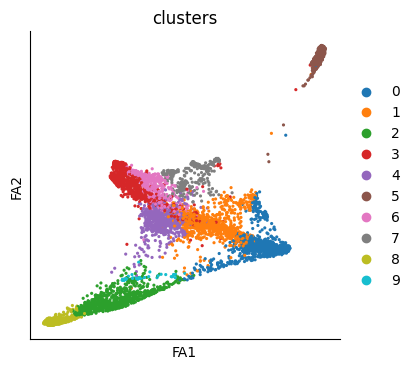

In [13]:
sc.pl.draw_graph(ad,color=['clusters'],color_map='magma')#,save='_clust.pdf')


In [14]:
ad.layers['MAGIC_imputed_data'] = ad.obsm['MAGIC_imputed_data']

## compare normalized gene expression v. MAGIC imputed

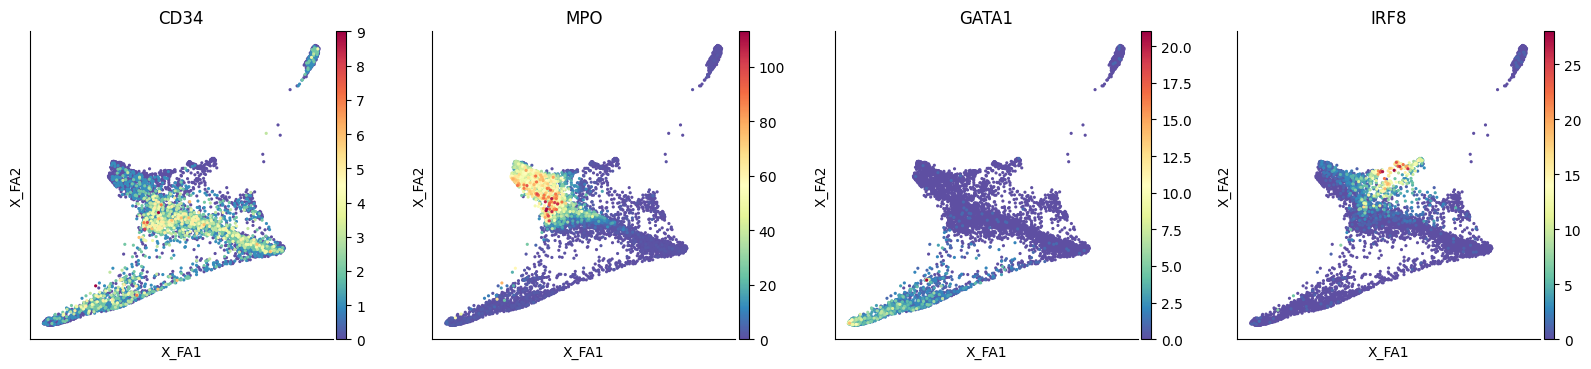

In [15]:
sc.pl.embedding(ad, basis='X_draw_graph_fa',
               color=['CD34', 'MPO', 'GATA1', 'IRF8'])

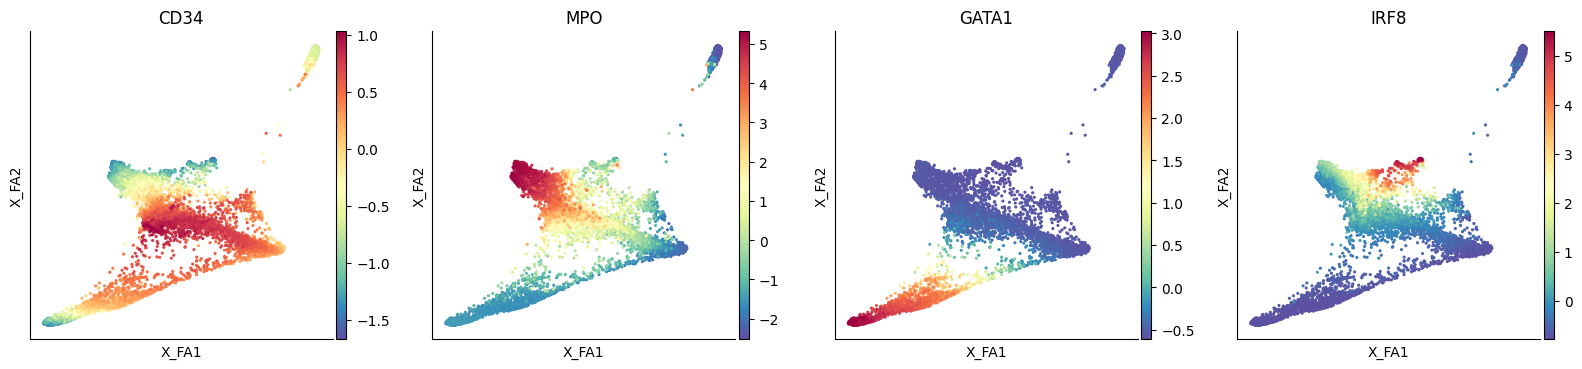

In [16]:
sc.pl.embedding(ad, basis='X_draw_graph_fa', layer='MAGIC_imputed_data',
               color=['CD34', 'MPO', 'GATA1', 'IRF8'])

## imputation with commute time kernel

In [17]:
from typing import Iterable, Union, Tuple, List
from scipy.sparse import csr_array, csr_matrix, issparse
from scipy.sparse.linalg import eigs
#from scipy import linalg
from scipy.sparse.csgraph import laplacian
#from scipy.linalg import eigh


In [18]:
def run_commute(
    data: Union[pd.DataFrame, sc.AnnData],
    n_components: int = 200,
    seed: Union[int, None] = 0,
    pca_key: str = "X_pca",
    kernel_key: str = "Kernel",
    sim_key: str = "Laplacian",
    eigval_key: str = "EigenValues",
    eigvec_key: str = "EigenVectors",
):

    if isinstance(data, sc.AnnData):
        data_df = pd.DataFrame(data.obsm[pca_key], index=data.obs_names)
    else:
        data_df = data

    if not isinstance(data_df, pd.DataFrame):
        raise ValueError("'data_df' should be a pd.DataFrame or a sc.AnnData instance")

    L = laplacian(ad.obsp['connectivities'], normed=False)

    # Eigen value dcomposition
    np.random.seed(seed)
    v0 = np.random.rand(min(L.shape))
    D, V = eigs(L, 40, tol=0, maxiter=1000000, which='SR', v0=v0)
    D = np.real(D)
    V = np.real(V)
    inds = np.argsort(D)#[::-1]
    D = D[inds[1:]]
    V = V[:, inds[1:]]

    # Normalize
    for i in range(V.shape[1]):
        V[:, i] = V[:, i] / np.linalg.norm(V[:, i])

    # Create are results dictionary
    res = {"L": L, "EigenVectors": V, "EigenValues": D}
    res["EigenVectors"] = pd.DataFrame(res["EigenVectors"])
    if not issparse(data_df):
        res["EigenVectors"].index = data_df.index
    res["EigenValues"] = pd.Series(res["EigenValues"])
    
    S = np.dot(np.diag(1/np.sqrt(D)),V.T)
    S = np.real(S)
    
    kernel = np.dot(S.T,S)
    kernel = np.real(kernel)
    
    from scipy.linalg import sqrtm
    
    kernel = sqrtm(kernel)
    
    res["kernel"] = kernel
    
    if isinstance(data, sc.AnnData):
        data.obsp[kernel_key] = res["kernel"]
        data.obsp[sim_key] = res["L"]
        data.obsm[eigvec_key] = res["EigenVectors"].values
        data.uns[eigval_key] = res["EigenValues"].values

    return res

In [19]:
run_commute(ad)    # ~1 min runtime

{'L': <5780x5780 sparse matrix of type '<class 'numpy.float32'>'
 	with 132644 stored elements in COOrdinate format>,
 'EigenVectors':                             0         1         2         3         4   \
 index                                                                    
 Run4_120703408880541  0.005159 -0.019386 -0.002212  0.001585  0.026098   
 Run4_120703409056541  0.003482  0.005800 -0.022928  0.001153 -0.008368   
 Run4_120703409580963  0.004177  0.010978  0.025233  0.021365 -0.009650   
 Run4_120703423990708  0.004177  0.010855  0.024587  0.021321 -0.009228   
 Run4_120703424252854  0.003664  0.007759  0.008502 -0.019416  0.005689   
 ...                        ...       ...       ...       ...       ...   
 Run5_241114589051630  0.005891 -0.035997  0.006915 -0.002579 -0.027890   
 Run5_241114589051819  0.003684  0.005670 -0.002683  0.000624  0.002904   
 Run5_241114589128940  0.004428 -0.003627  0.002513  0.002469  0.013369   
 Run5_241114589357942  0.005957 -0.037703

In [20]:
data = pd.DataFrame(ad.X, index=ad.obs_names, columns=ad.var_names)

imputed_data = pd.DataFrame(
        np.dot(ad.obsp['Kernel'], data), index=data.index, columns=data.columns
    )

In [21]:
ad.layers['commute_imputed_data'] = np.real(imputed_data)

In [22]:
ad.layers['commute_imputed_data']

array([[-2.44346380e+00, -3.13722831e-03,  4.18845713e-02, ...,
        -2.27488041e+00,  4.93753344e-01,  6.02171421e-01],
       [-6.09510720e-01,  6.11438602e-03,  5.00507653e-04, ...,
         8.37434411e-01, -2.34705031e-01, -2.48684928e-01],
       [-2.38108993e-01, -2.90653971e-03, -2.09510885e-02, ...,
         2.03915596e+00, -3.13009053e-01, -6.58144206e-02],
       ...,
       [-8.53008807e-01, -3.27320158e-05,  3.01458091e-02, ...,
         1.20143175e-01,  4.35277075e-01,  5.91416717e-01],
       [-3.99108005e+00, -3.50761227e-03,  1.03502378e-01, ...,
        -3.92228055e+00,  1.06678438e+00,  1.60489142e+00],
       [ 5.25461614e-01, -1.86318625e-03, -1.89318843e-02, ...,
         1.85199928e+00,  2.58092433e-01,  4.75892365e-01]], dtype=float32)

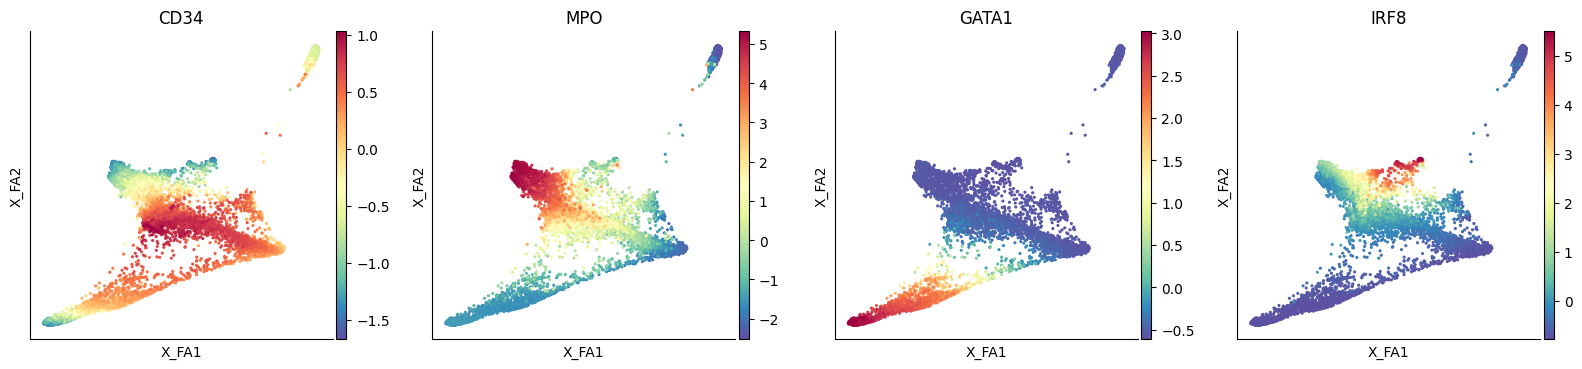

In [23]:
sc.pl.embedding(ad, basis='X_draw_graph_fa', layer='MAGIC_imputed_data',
               color=['CD34','MPO','GATA1','IRF8'],save='_magic.pdf')

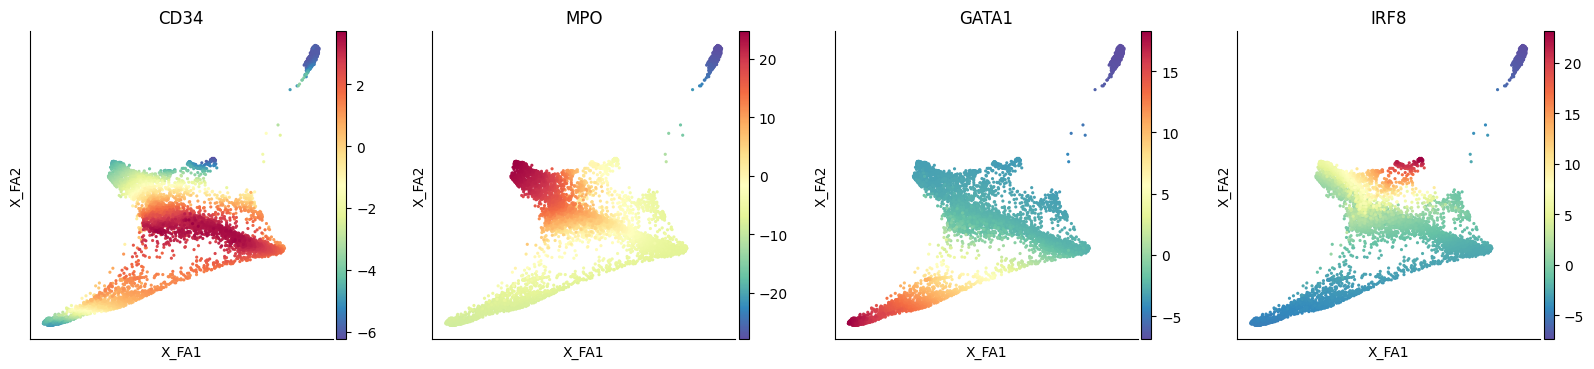

In [24]:
sc.pl.embedding(ad, basis='X_draw_graph_fa', layer='commute_imputed_data',
               color=['CD34','MPO','GATA1','IRF8'],save='_commute.pdf')

## pseudotime


In [25]:
np.flatnonzero(ad.obs_names == ad.obs['palantir_pseudotime'].idxmin())[0]

4823

In [26]:
ad.obs.iloc[4823]## or 'Run5_164698952452459' or Run5_205922701598003

clusters                          0
palantir_pseudotime             0.0
palantir_diff_potential    1.421836
dpt_pseudotime                  0.0
Name: Run5_205922701598003, dtype: object

In [27]:
from numpy import linalg as LA

In [28]:
mat = ad.obsp['Kernel']
np.real(mat[4823])

array([-0.0005959741,  0.0033652864, -0.000755002 , ..., -0.0006912543,
       -0.0010006392, -0.0002272862], dtype=float32)

In [29]:
lpt = []
for row in range(mat.shape[0]):
    z = LA.norm((mat[4823]-mat[row]),1)
    lpt.append(z)

In [30]:
lpt = np.asarray(lpt)
lpt = np.interp(lpt, (lpt.min(), lpt.max()), (0, +1))

In [31]:
lpt

array([0.4617801997, 0.0951593782, 0.4325633471, ..., 0.3778122967,
       0.575564263 , 0.3536679779])

In [32]:
ad.obs['lpt_pseudotime'] = lpt

In [33]:
ad.obs

,clusters,palantir_pseudotime,palantir_diff_potential,dpt_pseudotime,lpt_pseudotime
index,,,,,
Run4_120703408880541,2,0.528063,0.294430,0.176911,0.461780
Run4_120703409056541,0,0.071683,1.418632,0.037273,0.095159
Run4_120703409580963,3,0.748991,0.279959,0.174686,0.432563
Run4_120703423990708,3,0.712743,0.296824,0.176018,0.422624
Run4_120703424252854,4,0.514219,1.250914,0.133125,0.378257
...,...,...,...,...,...
Run5_241114589051630,8,0.803283,0.007726,0.300088,0.567511
Run5_241114589051819,1,0.386990,1.331768,0.094056,0.309719
Run5_241114589128940,4,0.451526,1.374819,0.128482,0.377812


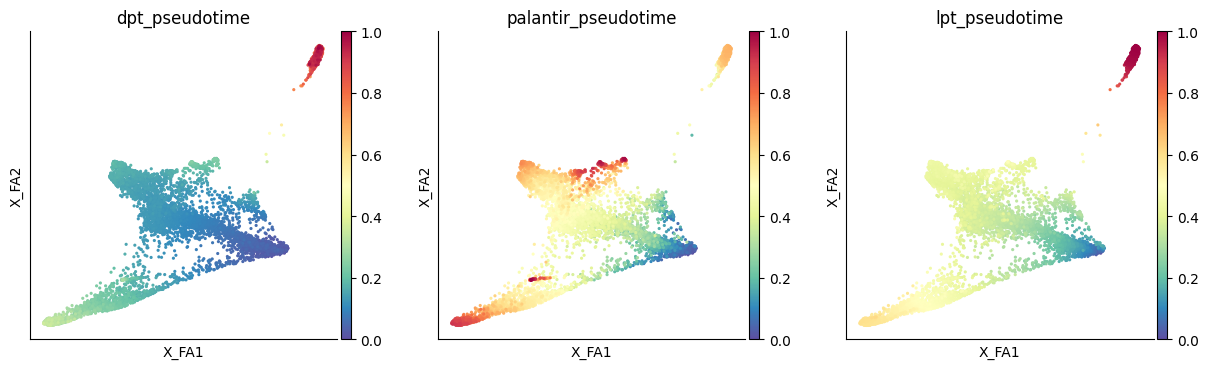

In [34]:
sc.pl.embedding(ad, basis='X_draw_graph_fa', color=['dpt_pseudotime','palantir_pseudotime','lpt_pseudotime'],save='_lptcomp.pdf')

In [35]:
np.corrcoef(ad.obs['lpt_pseudotime'].values,ad.obs['palantir_pseudotime'].values)

array([[1.          , 0.7094617612],
       [0.7094617612, 1.          ]])

In [36]:
np.corrcoef(ad.obs['lpt_pseudotime'].values,ad.obs['dpt_pseudotime'].values)

array([[1.          , 0.9474713352],
       [0.9474713352, 1.          ]])

In [37]:
np.corrcoef(ad.obs['dpt_pseudotime'].values,ad.obs['palantir_pseudotime'].values)

array([[1.          , 0.5143764454],
       [0.5143764454, 1.          ]])

In [38]:
from scipy import stats
resp = stats.kendalltau(ad.obs['lpt_pseudotime'].values,ad.obs['palantir_pseudotime'].values)

In [39]:
resp

SignificanceResult(statistic=0.7608592835447822, pvalue=0.0)

In [40]:
resp = stats.kendalltau(ad.obs['dpt_pseudotime'].values,ad.obs['palantir_pseudotime'].values)

In [41]:
resp

SignificanceResult(statistic=0.7568715268443015, pvalue=0.0)

In [42]:
resp = stats.kendalltau(ad.obs['dpt_pseudotime'].values,ad.obs['lpt_pseudotime'].values)

In [43]:
resp

SignificanceResult(statistic=0.9018781701482218, pvalue=0.0)

## exporting

In [ ]:
ad.obsp["Laplacian"]=ad.obsp["Laplacian"].tocsr()

In [ ]:
ad.write('rep1_proc.h5ad')

In [ ]:
pd.DataFrame(ad.obsm['X_draw_graph_fa']).to_csv('fa_coord_rep1.csv')

In [ ]:
pd.DataFrame(ad.obs['dpt_pseudotime']).to_csv('rep1_dpt.csv')

In [ ]:
pd.DataFrame(ad.obs['palantir_pseudotime']).to_csv('rep1_palan.csv')

In [ ]:
ad.X

In [ ]:
import pandas as pd
t=ad.raw.X.toarray()
pd.DataFrame(data=t, index=ad.obs_names, columns=ad.var_names).to_csv('marrow_raw_rep1.csv')